In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil  #Use esta libreria en lugar de datetime porque la base de datos tiene diferentes formatos en las fechas
from importlib import reload
reload(plt)  ##Esto soluciono un problema con plt.ylim()

%matplotlib inline

In [2]:
df = pd.read_csv('Datos2017.csv')
df.columns

Index(['Date', 'Time', 'TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt',
       'WindSpeed', 'WindDir', 'WindRun', 'HiSpeed', 'HiDir', 'WindChill',
       'HeatIndex', 'THWIndex', 'THSWIndex', 'Bar', 'Rain', 'RainRate',
       'SolarRad', 'SolarEnergy', 'HiSolarRad', 'HeatD-D', 'CoolD-D', 'InTemp',
       'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity', 'ET', 'WindSamp',
       'WindTx', 'ISSRecept', 'ArcInt'],
      dtype='object')

In [3]:
Date = df['Date'].values
print(Date[0:5])
Time = df['Time'].values
print(Time[0:5])
DateTime_str = Date + ' ' + Time
print(DateTime_str[0:5])
date_time = []
for dt in range(len(Date)):
    formato = dateutil.parser.parse(DateTime_str[dt], dayfirst=True)
    date_time.append(formato)
print(date_time[0:5])

['1/1/2017' '1/1/2017' '1/1/2017' '1/1/2017' '1/1/2017']
['12:15 AM' '12:30 AM' '12:45 AM' '1:00 AM' '1:15 AM']
['1/1/2017 12:15 AM' '1/1/2017 12:30 AM' '1/1/2017 12:45 AM'
 '1/1/2017 1:00 AM' '1/1/2017 1:15 AM']
[datetime.datetime(2017, 1, 1, 0, 15), datetime.datetime(2017, 1, 1, 0, 30), datetime.datetime(2017, 1, 1, 0, 45), datetime.datetime(2017, 1, 1, 1, 0), datetime.datetime(2017, 1, 1, 1, 15)]


In [4]:
temperature = df['TempOut'].values  #temperatura = df['TempOut'] #con values es un array, sin values es un archivo pandas?
print(temperature[0:10])
wind_speed = df['WindSpeed'].values*1.85
print(wind_speed[0:10])
wind_dir = df['WindDir'].values
print(wind_dir[0:10])
rain = df['Rain'].values
print(rain[0:10])
solar_rad = df['SolarRad'].values
print(solar_rad[0:10])

[13.2 13.1 13.  12.8 12.7 12.6 12.4 12.4 12.4 12.6]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0 0 0 0 0 0 0 0 0 0]


In [5]:
date_time[0]

datetime.datetime(2017, 1, 1, 0, 15)

In [6]:
print(date_time[0].year)
print(date_time[0].month)
print(date_time[0].day)
print(date_time[0].hour)
print(date_time[0].minute)

2017
1
1
0
15


In [7]:
# Ahora voy a generalizar para hacer una funcion que saque promedios mensuales para graficar el año

def monthly_averages(var, unit_var, user_color):
    all_averages = []  # Lista vacia para guardar el promedio de cada mes, en total 12 valores
    month = 0  #Contador del mes
    for n in range(12):
        month += 1  # Va sumando 1 para cambiar de mes 1-12
        month_values = []  # Lista para guardar todos los valores de un mes especifico
        for d in range(len(date_time)):  # Revisa cada valor en la base datos
            if date_time[d].month == month:  # para comparar si corresponde al mes en cuestion
                month_values.append(var[d])  # si coincide con el mes guarda el valor de la variable
        av = np.average(month_values)  # Promedio del mes en cuestion
        all_averages.append(av)  # Se agrega el promedio de cada mes

    x = range(1,13)
    y = all_averages
    plt.plot(x,y, color=user_color, marker='o')
    #plt.ylim([0+var.max()/2, var.max()+var.max()/2])
    plt.xlabel('Tiempo [mes]', fontsize=12)
    plt.ylabel(unit_var, fontsize=12)
    plt.title('Promedio mensual', fontsize=15)
    plt.show()

# Promedios mensuales

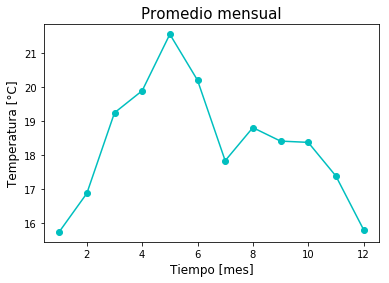

In [8]:
monthly_averages(temperature, 'Temperatura [°C]', 'c')

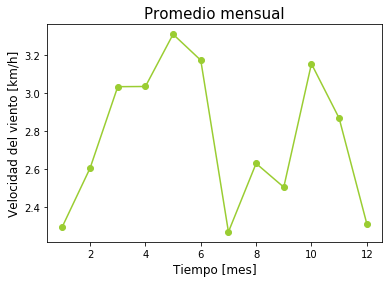

In [9]:
monthly_averages(wind_speed, 'Velocidad del viento [km/h]', 'yellowgreen')

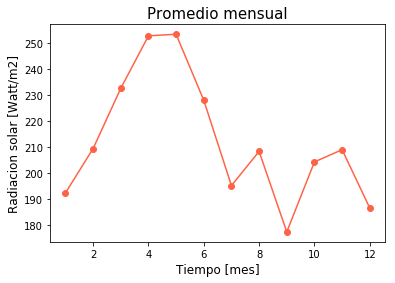

In [10]:
monthly_averages(solar_rad, 'Radiacion solar [Watt/m2]', 'tomato')

# Precipitacion anual acumulada

In [11]:
# Retomando la funcion monthly_averages con algunas modificaciones obtengo la precipitacion acumulada
# de cada mes

def accumulated(var, unit_var, user_color):
    all_months = []  # Lista vacia para guardar la cantidad acumulada de cada mes, en total 12 valores
    month = 0  #Contador del mes
    for n in range(12):
        month += 1  # Va sumando 1 para cambiar de mes 1-12
        month_values = []  # Lista para guardar todos los valores de un mes especifico
        for d in range(len(date_time)):  # Revisa cada valor en la base datos
            if date_time[d].month == month:  # para comparar si corresponde al mes en cuestion
                month_values.append(var[d])  # si coincide con el mes guarda el valor de la variable
        suma_total = sum(month_values)  # Suma total del mes en cuestion
        all_months.append(suma_total)  # Se agrega la suma total de cada mes

    x = range(1, 13)
    y = all_months
    plt.bar(x,y, color=user_color)
    #plt.ylim([0+var.max()/2, var.max()+var.max()/2])
    plt.xlabel('Tiempo [mes]', fontsize=12)
    plt.ylabel(unit_var, fontsize=12)
    plt.title('Precipitacion anual', fontsize=15)
    plt.show()

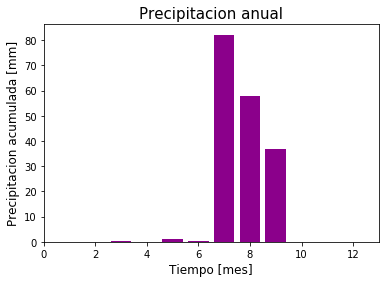

In [12]:
accumulated(rain, 'Precipitacion acumulada [mm]', 'darkmagenta')

# Radiacion promedio de un dia

In [13]:
def day_average(var, unit_var, user_color):
    all_averages = []  # Lista vacia para guardar el promedio de cada hora, en total 24 valores
    hour = -1  #Contador del mes
    for n in range(24):
        hour += 1  # Va sumando 1 para cambiar de hora 0-24
        hour_values = []  # Lista para guardar todos los valores de una hora especifica
        for h in range(len(date_time)):  # Revisa cada valor en la base datos
            if date_time[h].hour == hour:  # para comparar si corresponde a la hora en cuestion
                hour_values.append(var[h])  # si coincide con la hora guarda el valor de la variable
        av = np.average(hour_values)  # Promedio de la hora en cuestion
        all_averages.append(av)  # Se agrega el promedio de cada hora

    x = range(1, 25)
    y = all_averages
    plt.plot(x,y, color=user_color, marker='o')
    #plt.ylim([0+var.max()/2, var.max()+var.max()/2])
    plt.xlabel('Tiempo [hora]', fontsize=12)
    plt.ylabel(unit_var, fontsize=12)
    plt.title('Radiacion promedio de un dia', fontsize=15)
    plt.show()

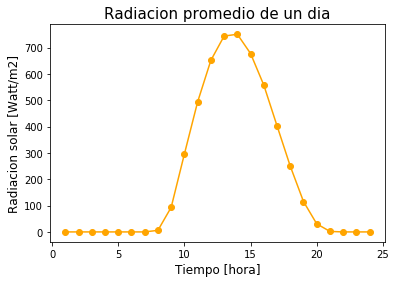

In [14]:
day_average(solar_rad, 'Radiacion solar [Watt/m2]', 'orange')